In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [23]:
# kmeans function 
def kmeans(X,k,max_iterations=1000, return_inertia=False):
    from sklearn.metrics import pairwise_distances
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k,replace=False)] 
    dist = pairwise_distances(X,means)
    clusters = np.argmin(dist, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        dist = pairwise_distances(X,means)
        new_clusters = np.argmin(dist, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    
    results = {'clusters' : clusters, 'means' : means}
    # compute inertia
    if return_inertia:
        results['inertia'] = np.sum([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])/m
    
    return results

# top-down hierarchical clustering

The goal of this problem is to write a function that implements divisive clustering (aka top-down hierarchical clustering).

Steps of Divisive Clustering:

- **Initialization:** Initially, all points in the dataset belong to one single cluster.
- **Step 1:** Select the cluster with the largest "sum of squared distances to its center".
- **Step 2:** Use kmeans to partition the selected cluster into two clusters.
- **Repeat** steps 1 and 2 until the desired number of clusters is obtained.

Test your function on the following toy dataset

In [24]:
# divisive_clustering function
def divisive_clustering(X,n_clusters=1):
    from sklearn.metrics import pairwise_distances
    #dataset size, number of features
    m,n = X.shape
    means=np.zeros((n_clusters,n))
    #Initialization: Initially, all points in the dataset belong to one single cluster.
    # start with two clusters
    k=2
    results=kmeans(X,k)
    means_init=results['means']
    means[0]=means_init[0]
    means[1]=means_init[1]
    clusters=results['clusters']



    #Step 1: Select the cluster with the largest "sum of squared distances to its center".
    while k<n_clusters:
        #Empty list for finding max distances
        max_dist=[]
        #find cluster with largest sum of distances
        for i in range(k):
            max_dist.append(np.sum(pairwise_distances(X[clusters==i],means[i].reshape(1,-1))))
        
        #cluster with largest distances
        largest_cluster=np.argmax(max_dist)
        
        #split the largest cluster
        results=kmeans(X[clusters==largest_cluster],2)
        means_split=results['means']
        clusters_split=results['clusters']
        
        
        #replace old center and new cluster center 
        means[largest_cluster]=means_split[0]
        means[k]=means_split[1]
        
        new_dist=pairwise_distances(X,means[:k+1])
        new_clusters = np.argmin(new_dist, axis=1)
        
        clusters=new_clusters
        k+=1
    for i in range(n_clusters):
        plt.scatter(X[:,0][clusters==i],X[:,1][clusters==i],label= 'cluster'+str(i))
    plt.legend()

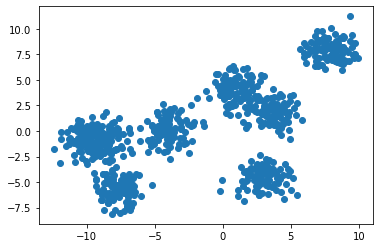

In [25]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=800,
                 centers = 8,
                 cluster_std=1,
                 random_state=3) 
plt.scatter(X[:,0],X[:,1])

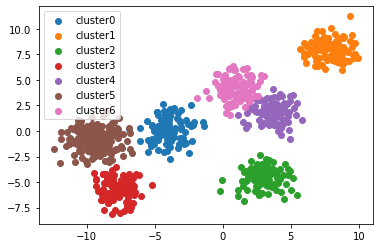

In [27]:
n_clusters=7
divisive_clustering(X,n_clusters)